In [ ]:
'''Image Classification Using CIFAR-10 Dataset using simple deep network with 4 hidden layers and 3 dropout layer
    also apply pruning and quantization to reduce size and report size of model'''



In [1]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 14.7 MB/s eta 0:00:00


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
The shape of train and test data: 
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Class 6: 5000 samples
Class 9: 5000 samples
Class 4: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 3: 5000 samples
Class 5: 5000 samples
Class 0: 5000 samples


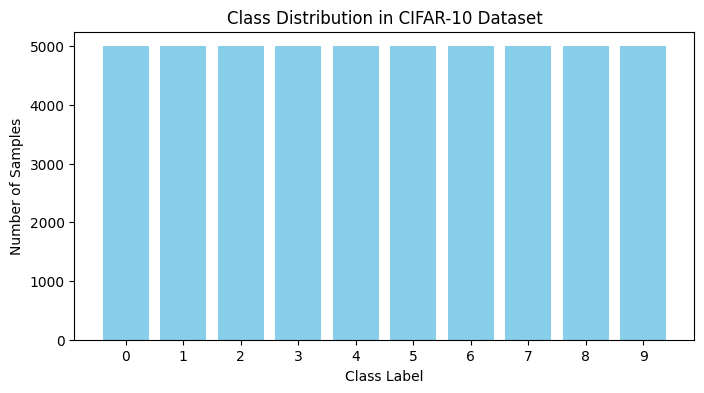

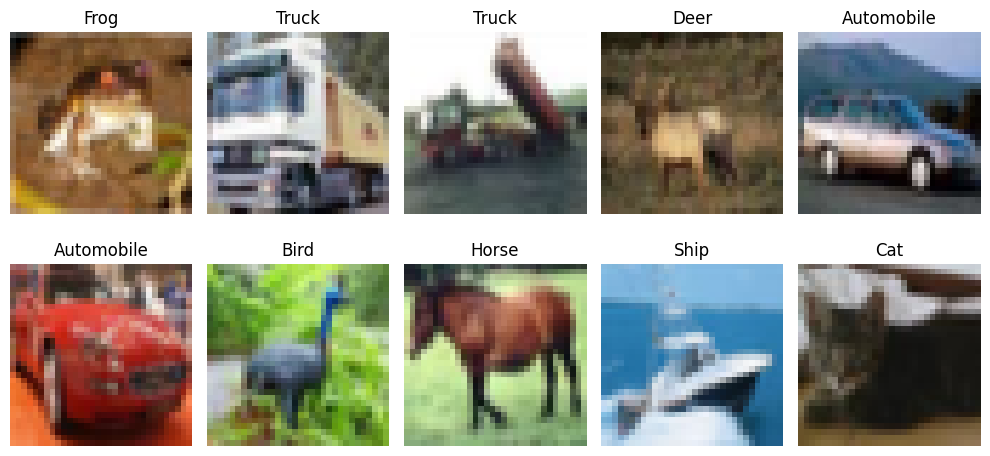

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Data Exploration

print("The shape of train and test data: ")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each class in the training dataset
class_counts = Counter(y_train.flatten())

# Display class distribution
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

# Plot class distribution
plt.figure(figsize=(8, 4))
plt.bar(class_counts.keys(), class_counts.values(), tick_label=list(class_counts.keys()), color='skyblue')
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in CIFAR-10 Dataset")
plt.show()

#Plotting of Sample Images

# CIFAR-10 class labels
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot sample images
num_images = 10  # Number of images to display
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(2, 5, i+1)  # Arrange in 2 rows, 5 columns
    plt.imshow(x_train[i])
    plt.title(class_labels[y_train[i][0]])  # Get class name
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,746,506 (6.66 MB)

 Trainable params: 1,746,506 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.1530 - loss: 2.2499 - val_accuracy: 0.2598 - val_loss: 2.0123
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.2416 - loss: 2.0044 - val_accuracy: 0.3198 - val_loss: 1.8878
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.2812 - loss: 1.9312 - val_accuracy: 0.3270 - val_loss: 1.8658
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.2899 - loss: 1.9178 - val_accuracy: 0.3314 - val_loss: 1.8284
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.3017 - loss: 1.8868 - val_accuracy: 0.3381 - val_loss: 1.8244
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.3082 - loss: 1.8796 - val_accuracy: 0.3408 - val_loss: 1.8438
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.3166 - loss: 1.8578 - val_accuracy: 0.3462 - val_loss: 1.8144
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3182 - loss: 1.84

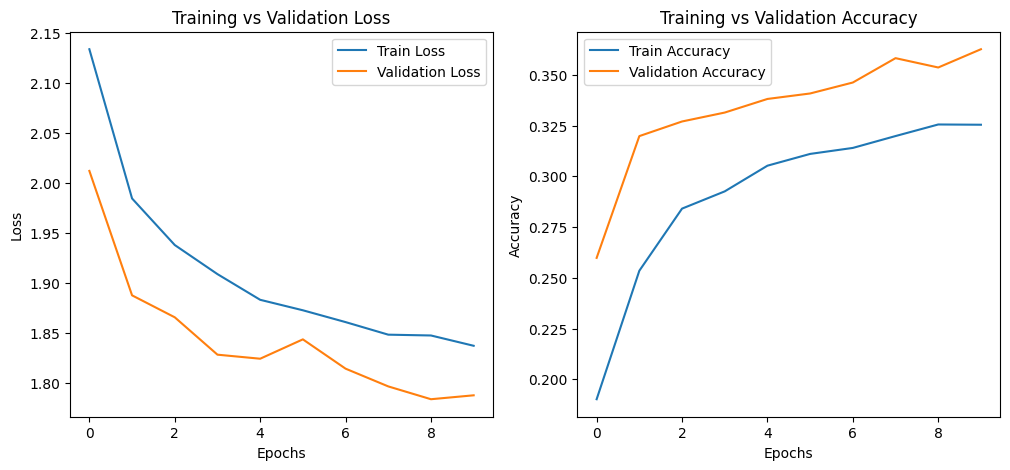

Test Accuracy: 36.81%


In [3]:
#DATA PRE-PROCESSING

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#Building Simple Deep Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(32, 32, 3)),  # Explicitly define input shape
    Flatten(),  # Flatten image to 1D
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Plot Training Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.show()

# Evaluate Test Accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")